In [1]:
!pip uninstall -y fhnw-nlp-utils==0.1.3
!pip install git+https://github.com/TheoHelfenberger/fhnw-nlp-utils@fix_plot_feature_importance
!pip install pyarrow fastparquet

from fhnw.nlp.utils.processing import parallelize_dataframe
from fhnw.nlp.utils.processing import is_iterable
from fhnw.nlp.utils.storage import download
from fhnw.nlp.utils.storage import save_dataframe
from fhnw.nlp.utils.storage import load_dataframe

import pandas as pd
import numpy as np

Found existing installation: fhnw-nlp-utils 0.1.3
Uninstalling fhnw-nlp-utils-0.1.3:
  Successfully uninstalled fhnw-nlp-utils-0.1.3
  Cloning https://github.com/TheoHelfenberger/fhnw-nlp-utils (to revision fix_plot_feature_importance) to /tmp/pip-req-build-ecp6vf8m
  Created wheel for fhnw-nlp-utils: filename=fhnw_nlp_utils-0.1.3-py3-none-any.whl size=17380 sha256=16bb060a38c37bd63e94128a1a4350d1a0a8ee0fd6d92119b8f1f9b65493c4ad
  Stored in directory: /tmp/pip-ephem-wheel-cache-chklzjvl/wheels/de/ab/03/ffa8cbb55e90d32c47d560a26718b8d65fe5305ed07c1f4917
Successfully built fhnw-nlp-utils
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [2]:
file = "data/german_news_articles_original_train_and_test_tokenized.parq"
data_all = load_dataframe(file)

In [6]:
data_all.sample(10)

,text_original,label,split,text_clean,token_clean,token_lemma,token_stem,token_clean_stopwords
4860,"Laut der ""Sunday Times"" plant der britische Pr...",International,train,Laut der Sunday Times plant der britische Prem...,"[laut, sunday, times, plant, britische, premie...","[laut, sunday, times, planen, britische, premi...","[laut, sunday, tim, plant, britisch, premi, lu...","[laut, sunday, times, plant, britische, premie..."
4362,Pjöngjang zieht angeblich geplanten Test laut ...,International,train,Pjöngjang zieht angeblich geplanten Test laut ...,"[pjöngjang, zieht, angeblich, geplanten, test,...","[pjöngjang, ziehen, angeblich, geplant, test, ...","[pjongjang, zieht, angeb, geplant, test, laut,...","[pjöngjang, zieht, angeblich, geplanten, test,..."
7487,36-Jähriger gewinnt Bergankunft auf 15. Etappe...,Sport,train,Jähriger gewinnt Bergankunft auf Etappe solo ...,"[jähriger, gewinnt, bergankunft, etappe, solo,...","[jähriger, gewinnen, bergankunft, etappe, solo...","[jahrig, gewinnt, bergankunft, etapp, solo, ma...","[jähriger, gewinnt, bergankunft, etappe, solo,..."
1392,Bis zu 80 Minuten Verspätung auf Strecke Salzb...,Panorama,train,Bis zu Minuten Verspätung auf Strecke Salzburg...,"[minuten, verspätung, strecke, salzburg, münch...","[minute, verspätung, strecke, salzburg, münche...","[minut, verspat, streck, salzburg, munch, rose...","[minuten, verspätung, strecke, salzburg, münch..."
5102,Die FPÖ werde für die bisher rot-schwarzen Reg...,Inland,train,Die FPÖ werde für die bisher rot schwarzen Reg...,"[fpö, bisher, rot, schwarzen, regionen, grünen...","[fpö, bisher, rot, schwarz, region, grün, stad...","[fpo, bish, rot, schwarz, region, grun, stadt,...","[fpö, bisher, rot, schwarzen, regionen, grünen..."
3047,Razzia gegen Helfer bei blutigen Zusammenstöße...,International,train,Razzia gegen Helfer bei blutigen Zusammenstöße...,"[razzia, helfer, blutigen, zusammenstößen, kum...","[razzia, helfer, blutig, zusammenstoß, kumanov...","[razzia, helf, blutig, zusammenstoss, kumanovo...","[razzia, helfer, blutigen, zusammenstößen, kum..."
476,Linken-Politiker Richter vermutet rechtsextrem...,International,train,Linken Politiker Richter vermutet rechtsextrem...,"[linken, politiker, richter, vermutet, rechtse...","[linke, politiker, richter, vermuten, rechtsex...","[link, polit, richt, vermutet, rechtsextrem, h...","[linken, politiker, richter, vermutet, rechtse..."
3346,"Esterbauer streitet mit Freistaat Bayern, der ...",Panorama,train,Esterbauer streitet mit Freistaat Bayern der E...,"[esterbauer, streitet, freistaat, bayern, eugh...","[esterbauer, streiten, freistaat, bayer, eugh,...","[esterbau, streitet, freistaat, bay, eugh, ber...","[esterbauer, streitet, freistaat, bayern, eugh..."
7855,Die neue Hauptverbandschefin sieht Vorteile fü...,Inland,train,Die neue Hauptverbandschefin sieht Vorteile fü...,"[neue, hauptverbandschefin, sieht, vorteile, p...","[neue, hauptverbandschefin, sehen, vorteil, pa...","[neu, hauptverbandschefin, sieht, vorteil, pat...","[neue, hauptverbandschefin, sieht, vorteile, p..."
8253,"Die Regeln könnten zur Folge haben, dass kapit...",Wirtschaft,train,Die Regeln könnten zur Folge haben dass kapita...,"[regeln, könnten, folge, kapitalintensive, ges...","[regel, folge, kapitalintensiv, geschäft, aufg...","[regeln, konnt, folg, kapitalintensiv, geschaf...","[regeln, könnten, folge, kapitalintensive, ges..."


Once more have a look at the dataset. It is rather small with only 10K entries.
Also some categories are much more popular than other (web and panorama).

Total number of lines 10273
Percentage by label
Panorama         0.163341
Web              0.163243
International    0.147085
Wirtschaft       0.137350
Sport            0.116908
Inland           0.098803
Etat             0.065025
Wissenschaft     0.055777
Kultur           0.052468
Name: label, dtype: float64


<AxesSubplot:>

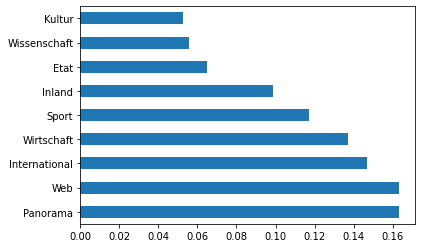

In [3]:
val_counts = data_all["label"].value_counts()

print(f'Total number of lines {len(data_all)}')
print('Percentage by label')
val_counts = val_counts / np.sum(val_counts)
print(val_counts)
val_counts.plot(kind='barh')

Implement the original split train/test again which was proposed by the authors of the dataset by using the column split.
Also split the train set further into train and validation.

In [4]:
from sklearn.model_selection import train_test_split

data_train_orig = data_all.loc[(data_all["split"] == "train")]
data_test_orig = data_all.loc[(data_all["split"] == "test")]


# ensure we retain the class weights by using stratify
# data_train, data_test = train_test_split(data_train_orig, shuffle=True, random_state=42, stratify=data_train_orig["label"])

X_train, y_train = data_train_orig["token_lemma"], data_train_orig["label"]
X_test, y_test = data_test_orig["token_lemma"], data_test_orig["label"]

In [21]:
# Just for fun - what happends if we choose the label random?
# y_train = y_train.reindex(np.random.permutation(y_train.index))
# y_test = y_test.reindex(np.random.permutation(y_test.index))

In [5]:
%%time
# Basic Baseline model
# Noting to do in CountVectorizer as we already did tokenize and used stopwords -> use identity lambda
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

pipe = Pipeline([
         ("vec", CountVectorizer(ngram_range=(1, 1), tokenizer=lambda x: x,preprocessor=lambda x: x, stop_words=None)),
         ('tfidf', TfidfTransformer()),
         ("clf", SGDClassifier())
        ])

CPU times: user 10 ms, sys: 5.84 ms, total: 15.9 ms
Wall time: 25.1 ms


In [6]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('vec',
                 CountVectorizer(preprocessor=<function <lambda> at 0x7fa5767a8378>,
                                 tokenizer=<function <lambda> at 0x7fa57837da60>)),
                ('tfidf', TfidfTransformer()), ('clf', SGDClassifier())])

In [23]:
# Just to see which words are encoded by the CountVectorizer 
pipe['vec'].get_feature_names()[500:510]

['abgerufen',
 'abgerundet',
 'abgerückt',
 'abgesackt',
 'abgesackten',
 'abgesagt',
 'abgesandelt',
 'abgesandt',
 'abgesandte',
 'abgesandter']

Use a text headline from Tages Anzeiger to see what how the pipelines encodes it into tf-idf

In [24]:
text = "Planlos Bundesrat schweigend Mehrheit egoistische Minderheit Die Schweiz steckt in der Pandemie Bewaltig in der Sackgasse und droht die Perspektive zu verlieren"
text_tokens = text.lower().split(" ")
feature_names = pipe['vec'].get_feature_names()
tr = pipe[:-1].transform([text_tokens]).toarray()[0]
#voc = pipe['vec'].vocabulary_
print("Position in vector, tf-idf value, word")
[(p[0], p[1], feature_names[p[0]])  for p in enumerate(tr) if p[1] > 0.0]

Position in vector, tf-idf value, word


[(20556, 0.2566595587364793, 'bundesrat'),
 (28907, 0.3391536579801839, 'droht'),
 (30220, 0.3543767167485712, 'egoistische'),
 (81417, 0.15920079598072123, 'mehrheit'),
 (83293, 0.20675757153214225, 'minderheit'),
 (93279, 0.3543767167485712, 'pandemie'),
 (95229, 0.20461157702954938, 'perspektive'),
 (96452, 0.3283527258951063, 'planlos'),
 (107777, 0.27872782247643185, 'sackgasse'),
 (111854, 0.3283527258951063, 'schweigend'),
 (111893, 0.18128980837140823, 'schweiz'),
 (120384, 0.3391536579801839, 'steckt'),
 (135689, 0.12947604253664233, 'verlieren')]

In [7]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

In [8]:
from sklearn.metrics import classification_report

report = classification_report(y_train, y_train_pred)
print("Train:")
print(report)
report = classification_report(y_test, y_test_pred)
print("Test:")
print(report)

Train:
               precision    recall  f1-score   support

         Etat       1.00      0.99      0.99       601
       Inland       0.98      0.99      0.99       913
International       1.00      0.99      0.99      1360
       Kultur       1.00      1.00      1.00       485
     Panorama       0.99      0.99      0.99      1510
        Sport       1.00      1.00      1.00      1081
          Web       0.99      0.99      0.99      1509
   Wirtschaft       0.98      0.99      0.99      1270
 Wissenschaft       0.99      1.00      1.00       516

     accuracy                           0.99      9245
    macro avg       0.99      0.99      0.99      9245
 weighted avg       0.99      0.99      0.99      9245

Test:
               precision    recall  f1-score   support

         Etat       0.90      0.79      0.84        67
       Inland       0.84      0.84      0.84       102
International       0.89      0.82      0.86       151
       Kultur       0.84      0.87      0.85    

Set Population: 1028
Accuracy: 0.8774


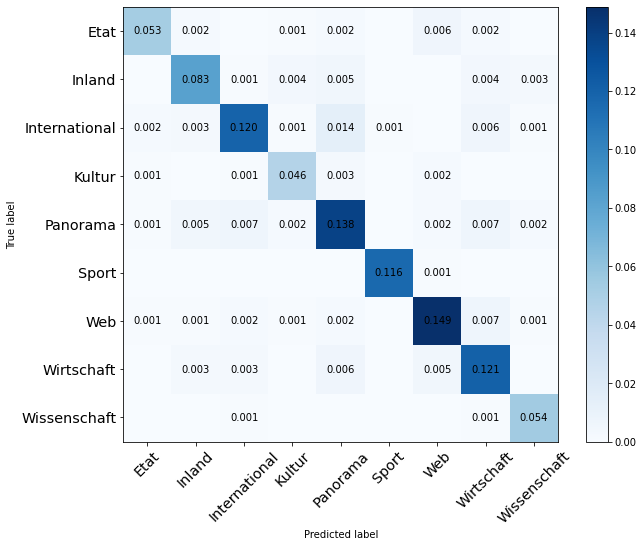

In [27]:
from fhnw.nlp.utils.ploting import plot_confusion_matrix

#plot_confusion_matrix(y_train, y_train_pred)
plot_confusion_matrix(y_test, y_test_pred)

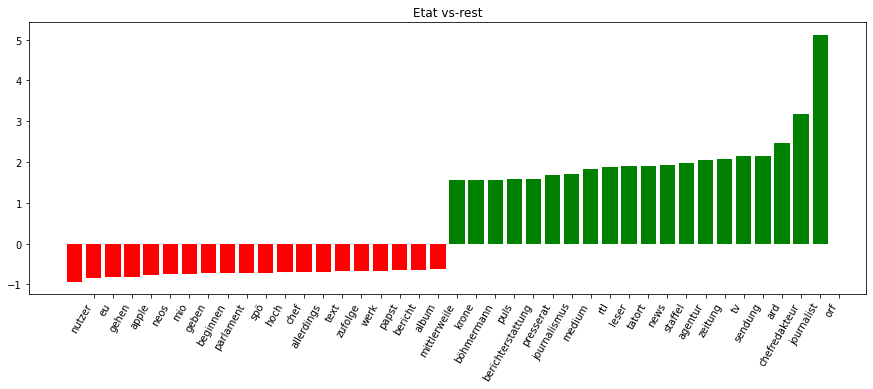

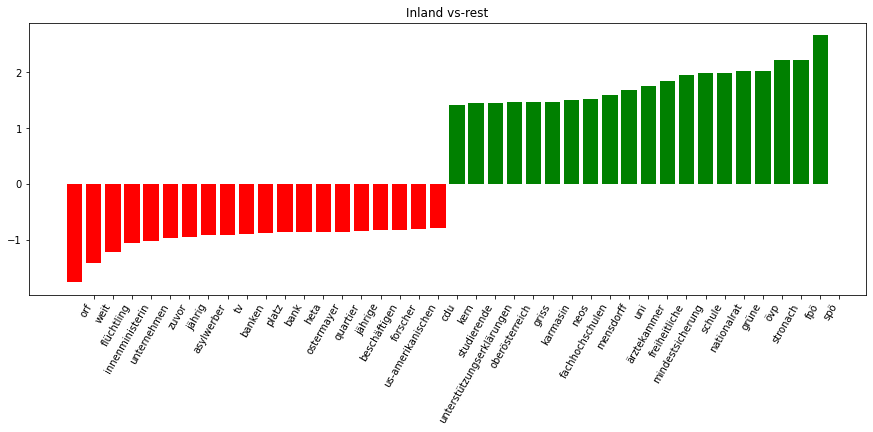

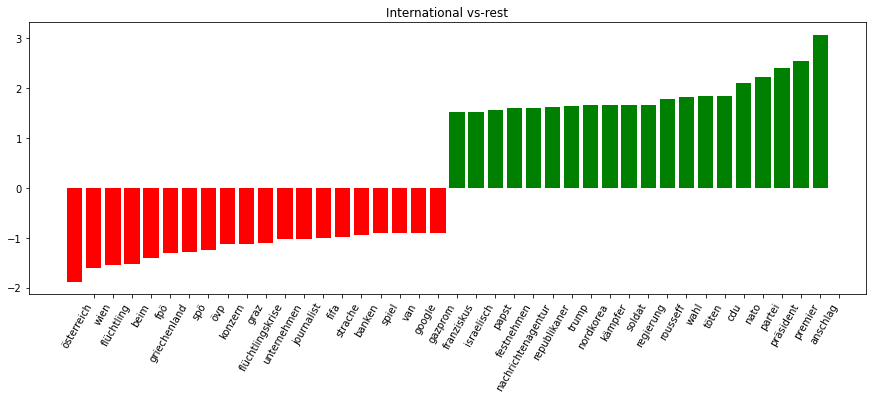

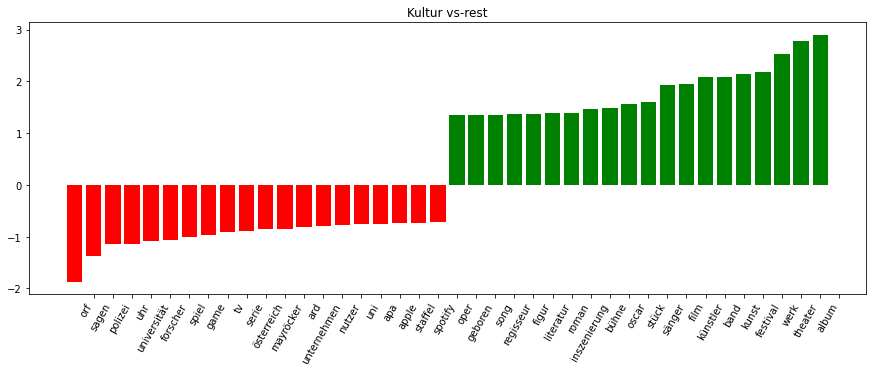

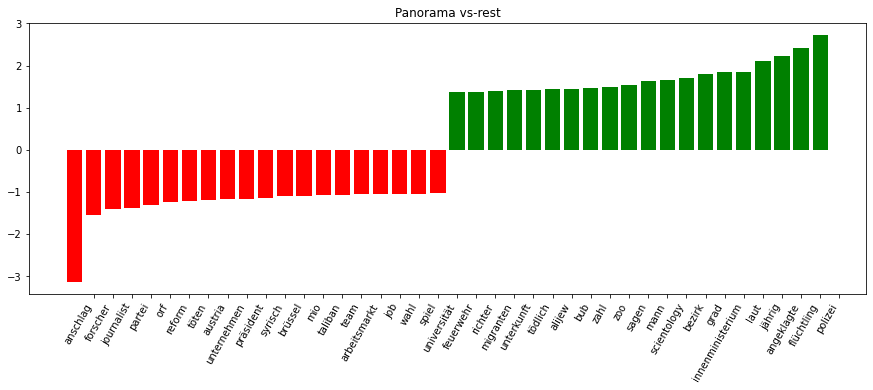

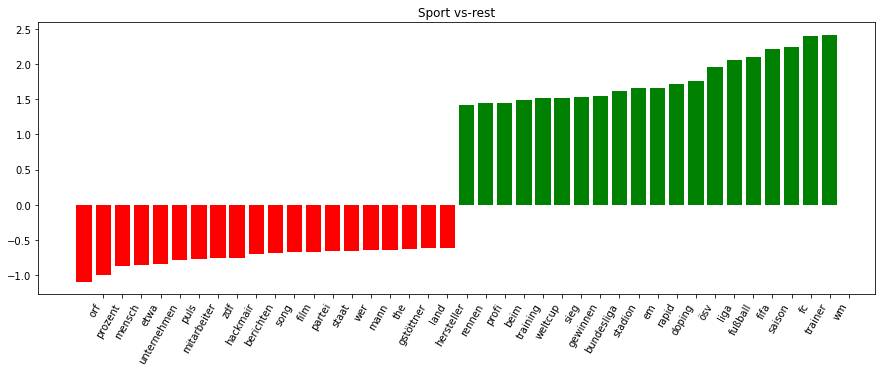

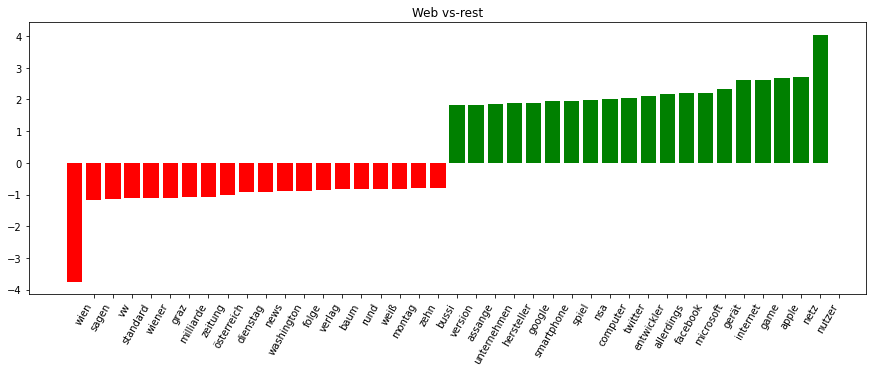

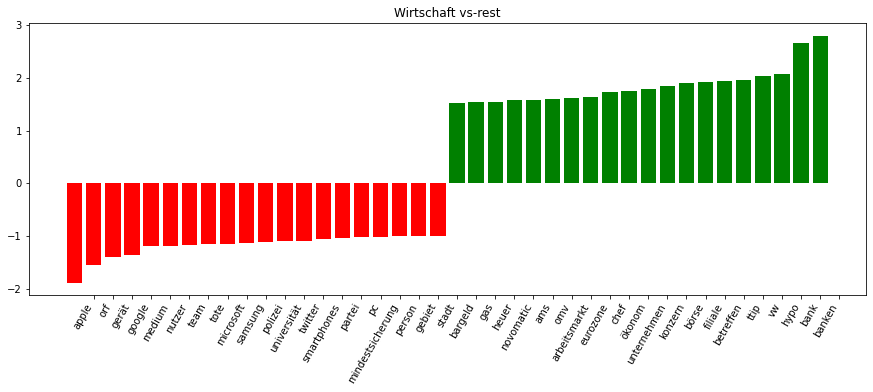

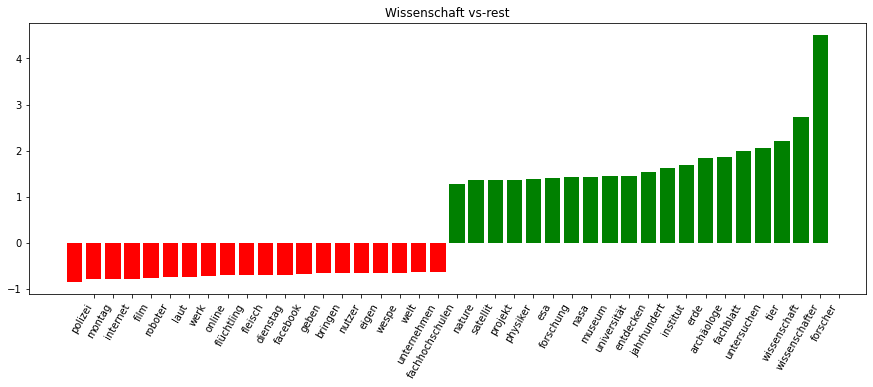

In [28]:
from fhnw.nlp.utils.ploting import plot_feature_importance  
vectorizer = pipe.named_steps["vec"]
# only works since SGDClassifier uses LinearSVC by default
classifier = pipe.named_steps["clf"]

plot_feature_importance(classifier, vectorizer.get_feature_names())

In [29]:
row = 167
print(data_test.iloc[row, 0], data_test.iloc[row, 1])
pipe.predict(X_test.iloc[row].reshape(1,-1))

Stellungnahme soll in den kommenden zwei Wochen erfolgen. Wien – Kulturminister Josef Ostermayer (SPÖ) plant, in den kommenden zwei Wochen zum mit dem Burgtheater befassten Rechnungshof-Rohbericht Stellung zu nehmen. Darin werden viele Dinge bestätigt, was die Vorgangsweise betrifft, die wir gewählt haben, betonte er am Mittwoch am Rande einer Pressekonferenz. Viele der Anregungen wurden entweder schon umgesetzt oder werden noch umgesetzt. Grundsätzlich habe er drei Monate Zeit, um zum Rohbericht, der noch nicht zur Veröffentlichung bestimmt ist, eine Stellungnahme abzugeben. Es gebe darin auch drei Punkte, die er als formale Fehler oder missverständliche Äußerungen seitens des RH bezeichnete. Da braucht es eine gewisse Präzisierung im Endbericht. Etwa die Frage: Wer beruft ab, wer entlässt? Das ist klar geregelt. Unabhängig vom RH-Bericht habe man verschiedene Schritte gesetzt beziehungsweise setzen müssen. Hätten wir 2014 nicht zeitgerecht reagiert, würden wir jetzt vor anderen Probl

array(['International'], dtype='<U13')

### OneVsOne Classification

In [14]:
%%time
# Let's try one vs one classification. Will need to compute 9 * 8 / 2 = 36 models
# Noting to do in CountVectorizer as we already did tokenize and used stopwords -> use identity lambda
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.multiclass import OneVsOneClassifier
from sklearn.pipeline import Pipeline

pipeOneVsOne = Pipeline([
         ("vec", CountVectorizer(ngram_range=(1, 1), tokenizer=lambda x: x,preprocessor=lambda x: x, stop_words=None)),
         ('tfidf', TfidfTransformer()),
         ("clf", OneVsOneClassifier(SGDClassifier()))
        ])
pipeOneVsOne.fit(X_train, y_train)
y_test_predOneVsOne = pipeOneVsOne.predict(X_test)

CPU times: user 3.22 s, sys: 6.61 s, total: 9.83 s
Wall time: 1.42 s


### Some other classifiers
DummyClassifier, KNeighborsClassifier and RandomForestClassifier


In [11]:
from sklearn.dummy import DummyClassifier
classifier = DummyClassifier(strategy='stratified')

pipeDummy = Pipeline([
         ("vec", CountVectorizer(ngram_range=(1, 1), tokenizer=lambda x: x,preprocessor=lambda x: x, stop_words=None)),
         ('tfidf', TfidfTransformer()),
         ("clf", classifier)
        ])


pipeDummy.fit(X_train, y_train)
y_test_predDummy = pipeDummy.predict(X_test)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
classifier = KNeighborsClassifier()

pipeKNN = Pipeline([
         ("vec", CountVectorizer(ngram_range=(1, 1), tokenizer=lambda x: x,preprocessor=lambda x: x, stop_words=None)),
         ('tfidf', TfidfTransformer()),
         ("clf", classifier)
        ])


pipeKNN.fit(X_train, y_train)
y_test_predKNN = pipeKNN.predict(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()


pipeRF = Pipeline([
         ("vec", CountVectorizer(ngram_range=(1, 1), tokenizer=lambda x: x,preprocessor=lambda x: x, stop_words=None)),
         ('tfidf', TfidfTransformer()),
         ("clf", classifier)
        ])


pipeRF.fit(X_train, y_train)
y_test_predRF = pipeRF.predict(X_test)

In [9]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()


pipeBayes = Pipeline([
         ("vec", CountVectorizer(ngram_range=(1, 1), tokenizer=lambda x: x,preprocessor=lambda x: x, stop_words=None)),
         ('tfidf', TfidfTransformer()),
         ("clf", classifier)
        ])


pipeBayes.fit(X_train, y_train)
y_test_predBayes = pipeBayes.predict(X_test)

In [15]:
# The result for one vs one is not as good as one vs rest
# The results are really bad for KNN and Random Forest
# Will not try to improve further


report = classification_report(y_test, y_test_predDummy)
print("Test Dummy Classifier:")
print(report)
report = classification_report(y_test, y_test_pred)
print("Test SGDClassifier:")
print(report)
report = classification_report(y_test, y_test_predOneVsOne)
print("Test SGDClassifier One vs One:")
print(report)
report = classification_report(y_test, y_test_predKNN)
print("Test KNeighborsClassifier:")
print(report)
report = classification_report(y_test, y_test_predRF)
print("Test RandomForestClassifier:")
print(report)
report = classification_report(y_test, y_test_predBayes)
print("Test MB Naive Bayes Classifier:")
print(report)

Test Dummy Classifier:
               precision    recall  f1-score   support

         Etat       0.07      0.07      0.07        67
       Inland       0.08      0.08      0.08       102
International       0.11      0.11      0.11       151
       Kultur       0.06      0.07      0.07        54
     Panorama       0.14      0.13      0.14       168
        Sport       0.11      0.10      0.10       120
          Web       0.18      0.19      0.18       168
   Wirtschaft       0.13      0.13      0.13       141
 Wissenschaft       0.06      0.05      0.06        57

     accuracy                           0.12      1028
    macro avg       0.10      0.11      0.10      1028
 weighted avg       0.12      0.12      0.12      1028

Test SGDClassifier:
               precision    recall  f1-score   support

         Etat       0.90      0.79      0.84        67
       Inland       0.84      0.84      0.84       102
International       0.89      0.82      0.86       151
       Kultur     

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Is token-lemma the best choice

In [47]:
X_train_stem = data_train_orig["token_stem"]
X_test_stem = data_test_orig["token_stem"]

X_train_clean_stop = data_train_orig["token_clean_stopwords"]
X_test_clean_stop = data_test_orig["token_clean_stopwords"]

In [58]:
%%time
pipe.fit(X_train_stem, y_train)
y_test_stem = pipeRF.predict(X_test_stem)

pipe.fit(X_train_clean_stop, y_train)
y_test_clean_stop = pipeRF.predict(X_test_clean_stop)

CPU times: user 5.92 s, sys: 10.9 s, total: 16.8 s
Wall time: 2.81 s


In [60]:
# No discussion here as well -> Stemming is expensive BUT the result speak for themselves
report = classification_report(y_test, y_test_pred)
print("Test SGDClassifier on token_lemma:")
print(report)
report = classification_report(y_test, y_test_stem)
print("Test SGDClassifier on token_stem")
print(report)
report = classification_report(y_test, y_test_clean_stop)
print("Test SGDClassifier on token_clean_stopwords")
print(report)

Test SGDClassifier on token_lemma:
               precision    recall  f1-score   support

         Etat       0.92      0.81      0.86        67
       Inland       0.86      0.83      0.85       102
International       0.89      0.81      0.85       151
       Kultur       0.84      0.87      0.85        54
     Panorama       0.82      0.85      0.83       168
        Sport       0.99      0.99      0.99       120
          Web       0.91      0.91      0.91       168
   Wirtschaft       0.82      0.88      0.85       141
 Wissenschaft       0.89      0.96      0.92        57

     accuracy                           0.88      1028
    macro avg       0.88      0.88      0.88      1028
 weighted avg       0.88      0.88      0.88      1028

Test SGDClassifier on token_stem
               precision    recall  f1-score   support

         Etat       0.74      0.48      0.58        67
       Inland       0.81      0.53      0.64       102
International       0.71      0.82      0.76    

In [61]:
! pip install install git+https://github.com/scikit-optimize/scikit-optimize.git

  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-1aanc_y8
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pyaml-21.10.1-py2.py3-none-any.whl (24 kB)
  Using cached PyYAML-6.0-cp36-cp36m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (603 kB)
  Created wheel for scikit-optimize: filename=scikit_optimize-0.9.0-py2.py3-none-any.whl size=100268 sha256=f9e28bacd5f0c9b489e9bc25209c8080aded056b5472b49553e350e4e43a3211
  Stored in directory: /tmp/pip-ephem-wheel-cache-dd7k7m0b/wheels/a6/18/3a/f5a8100b6f43b1c60878a02393d97b4fe52e987aec42c1001c
Successfully built scikit-optimize
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [62]:
from sklearn.metrics import f1_score, make_scorer

scoring_function = make_scorer(f1_score, average='weighted')

In [25]:
# https://scikit-optimize.github.io/stable/auto_examples/sklearn-gridsearchcv-replacement.html#sphx-glr-auto-examples-sklearn-gridsearchcv-replacement-py
from sklearn.model_selection import StratifiedKFold
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

pipeOpt = Pipeline([
         ("vec", CountVectorizer(ngram_range=(1,2), tokenizer=lambda x: x,preprocessor=lambda x: x, stop_words=None)),
         ('tfidf', TfidfTransformer()),
         ("clf", SGDClassifier())
        ])

params = {
    "vec__max_df": Real(0.5, 1.0), 
    "vec__min_df": Real(0.0001, 0.3, prior="log-uniform"), 
    #"vec__ngram_range": Categorical([(1, 1), (1, 2)]), 
    "tfidf__use_idf": Categorical([True, False]),
    "tfidf__norm": ["l1", "l2"],
    "tfidf__sublinear_tf": Categorical([True, False]),
    #"clf__class_weight": Categorical([None, "balanced"]),
    "clf__alpha": Real(0.0000001, 0.1, prior="log-uniform"),
}

opt = BayesSearchCV(
    pipeOpt,
    # (parameter space, # of evaluations)
    [(params, 30)],
    scoring=scoring_function,
    n_jobs=-1, 
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    verbose=2
) 

ModuleNotFoundError: No module named 'skopt'

In [80]:
%%time
_ = opt.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

In [22]:
best_params_ = eval("[('clf__alpha', 6.232887524573945e-05), ('tfidf__norm', 'l2'), ('tfidf__sublinear_tf', False), ('tfidf__use_idf', True), ('vec__max_df', 1.0), ('vec__min_df', 0.00032291887960613543)]")

In [27]:
#print(opt.best_score_)
#print(opt.best_params_)

pipeOpt = Pipeline([
         ("vec", CountVectorizer(ngram_range=(1,1), tokenizer=lambda x: x,preprocessor=lambda x: x, stop_words=None)),
         ('tfidf', TfidfTransformer()),
         ("clf", SGDClassifier())
        ])

pipeOpt.set_params(**best_params_)
pipeOpt.fit(X_train, y_train)

TypeError: set_params() argument after ** must be a mapping, not list

In [82]:
y_test_pred_opti = pipeOpt.predict(X_test)

report = classification_report(y_test, y_test_pred)
print("Test SGDClassifier on token_lemma:")
print(report)
report = classification_report(y_test, y_test_pred_opti)
print("Test SGDClassifier optimized")
print(report)

Test SGDClassifier on token_lemma:
               precision    recall  f1-score   support

         Etat       0.92      0.82      0.87        67
       Inland       0.86      0.84      0.85       102
International       0.89      0.82      0.86       151
       Kultur       0.84      0.87      0.85        54
     Panorama       0.81      0.84      0.82       168
        Sport       0.99      0.99      0.99       120
          Web       0.91      0.92      0.91       168
   Wirtschaft       0.83      0.88      0.86       141
 Wissenschaft       0.90      0.96      0.93        57

     accuracy                           0.88      1028
    macro avg       0.88      0.88      0.88      1028
 weighted avg       0.88      0.88      0.88      1028

Test SGDClassifier optimized
               precision    recall  f1-score   support

         Etat       0.92      0.81      0.86        67
       Inland       0.85      0.83      0.84       102
International       0.91      0.83      0.87       1